# Inspecting the Anonymized Images

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from pathlib import Path

## CelebA

In [8]:
CELEB_A_ORIGINAL_PATH_TRAIN = "./datasets/CelebA/CelebA_original/train/"
CELEB_A_MASKED_PATH_TRAIN = "./datasets/CelebA/CelebA_masked/train/"
CELEB_A_PIXELATED_PATH_TRAIN = "./datasets/CelebA/CelebA_pixelated/train/"

In [9]:
def show_image_versions(img_name):
    original_img_path = CELEB_A_ORIGINAL_PATH_TRAIN + img_name
    masked_img_path = CELEB_A_MASKED_PATH_TRAIN + img_name
    pixelated_img_path = CELEB_A_PIXELATED_PATH_TRAIN + img_name
    
    try:
        original_img = Image.open(original_img_path)
        masked_img = Image.open(masked_img_path)
        pixelated_img = Image.open(pixelated_img_path)
        
        fig, axs = plt.subplots(1, 3, figsize=(12, 4))
        
        axs[0].imshow(original_img)
        axs[0].set_title("Original")
        axs[0].axis("off")
        
        axs[1].imshow(masked_img)
        axs[1].set_title("Masked")
        axs[1].axis("off")
        
        axs[2].imshow(pixelated_img)
        axs[2].set_title("Pixelated")
        axs[2].axis("off")
        
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Error while reading {img_name}: {e}")

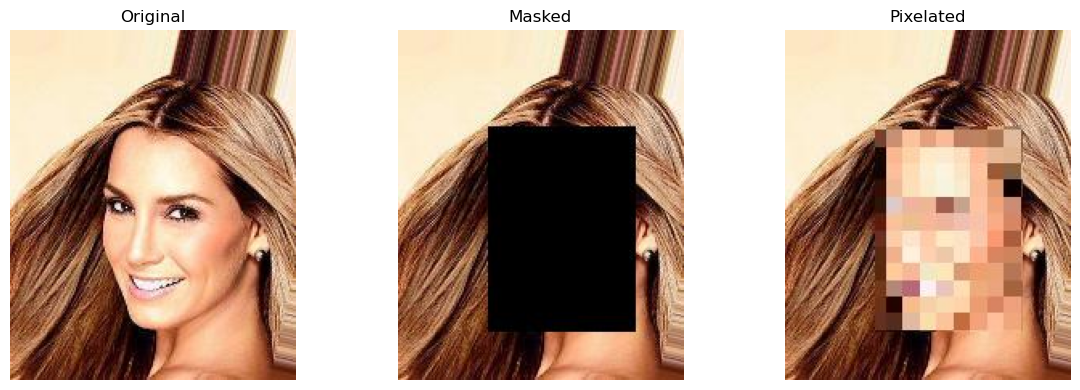

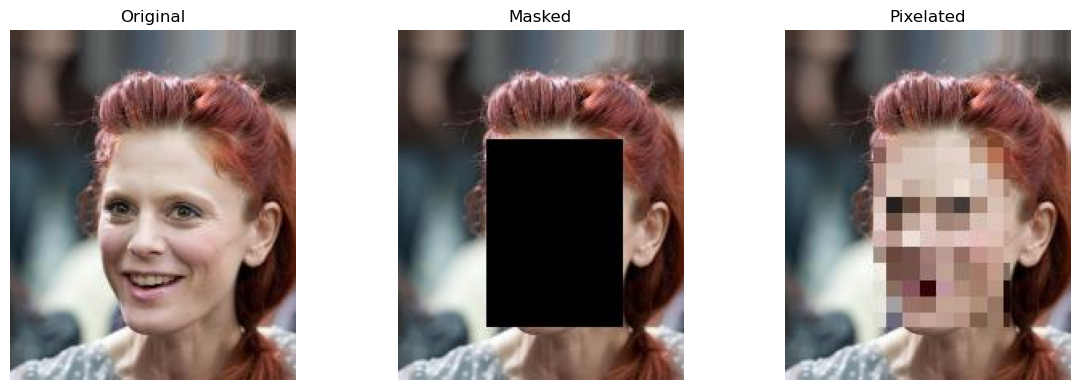

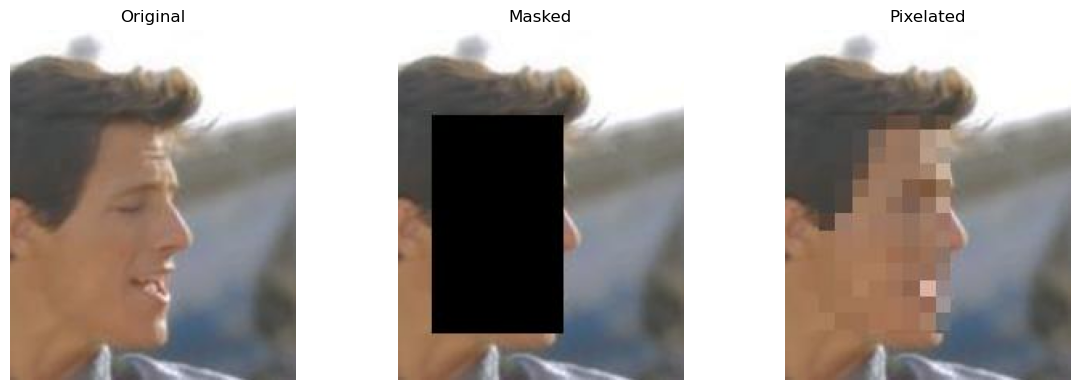

In [10]:
image_names = ["000001.jpg", "000002.jpg", "000003.jpg"]
for img_name in image_names:
    show_image_versions(img_name)

## RVL-CDIP

In [1]:
# from paddleocr import PaddleOCR, draw_ocr

In [2]:
RVL_CDIP_ORIGINAL_PATH_VAL = "./datasets/RVL-CDIP/RVL-CDIP_original/val/"
RVL_CDIP_25_MASKED_PATH_VAL = "./datasets/RVL-CDIP/RVL-CDIP_25_masked/val/"
RVL_CDIP_50_MASKED_PATH_VAL = "./datasets/RVL-CDIP/RVL-CDIP_50_masked/val/"
RVL_CDIP_75_MASKED_PATH_VAL = "./datasets/RVL-CDIP/RVL-CDIP_75_masked/val/"
RVL_CDIP_100_MASKED_PATH_VAL = "./datasets/RVL-CDIP/RVL-CDIP_100_masked/val/"

In [3]:
def show_image_versions_rvl_cdip(img_name):
    original_img_path = RVL_CDIP_ORIGINAL_PATH_VAL + img_name
    masked_25_img_path = RVL_CDIP_25_MASKED_PATH_VAL + img_name
    masked_50_img_path = RVL_CDIP_50_MASKED_PATH_VAL + img_name
    masked_75_img_path = RVL_CDIP_75_MASKED_PATH_VAL + img_name
    masked_100_img_path = RVL_CDIP_100_MASKED_PATH_VAL + img_name
    
    try:
        original_img = Image.open(original_img_path)
        masked_25_img = Image.open(masked_25_img_path)
        masked_50_img = Image.open(masked_50_img_path)
        masked_75_img = Image.open(masked_75_img_path)
        masked_100_img = Image.open(masked_100_img_path)
        
        fig, axs = plt.subplots(1, 5, figsize=(15, 4))
        
        axs[0].imshow(original_img)
        axs[0].set_title("Original")
        axs[0].axis("off")
        
        axs[1].imshow(masked_25_img)
        axs[1].set_title("Masked 25%")
        axs[1].axis("off")
        
        axs[2].imshow(masked_50_img)
        axs[2].set_title("Masked 50%")
        axs[2].axis("off")
        
        axs[3].imshow(masked_75_img)
        axs[3].set_title("Masked 75%")
        axs[3].axis("off")
        
        axs[4].imshow(masked_100_img)
        axs[4].set_title("Masked 100%")
        axs[4].axis("off")
        
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Error while reading {img_name}: {e}")

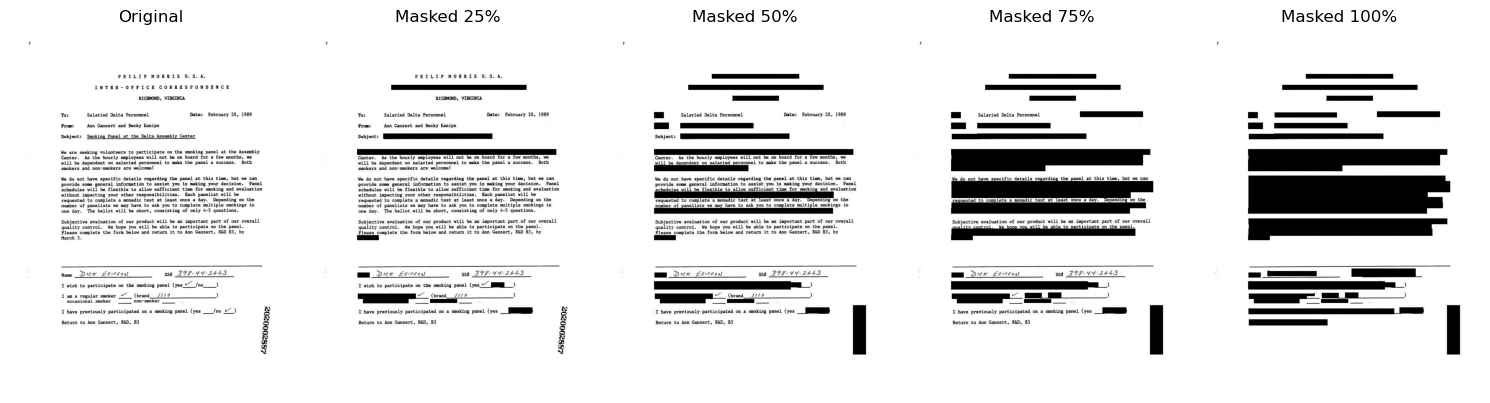

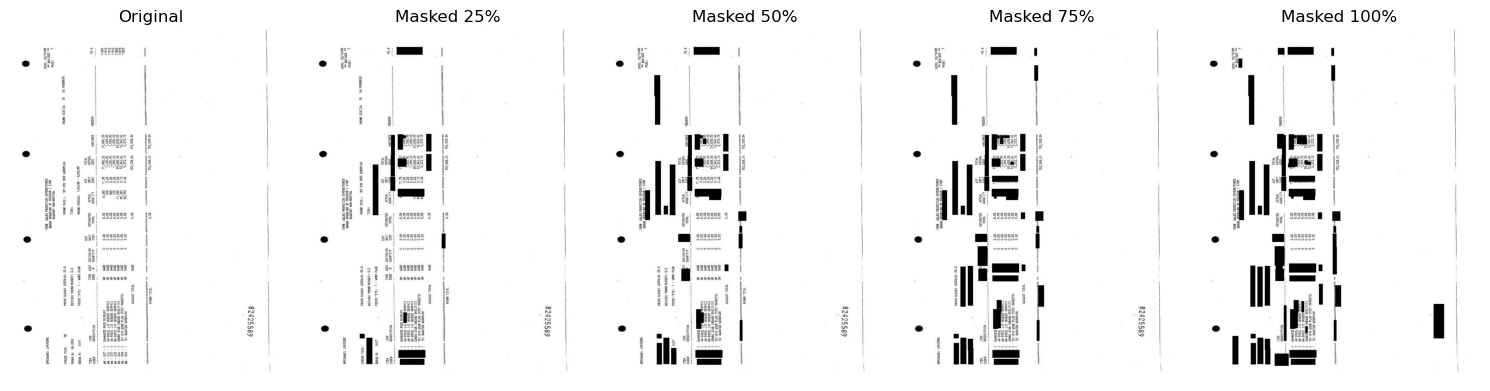

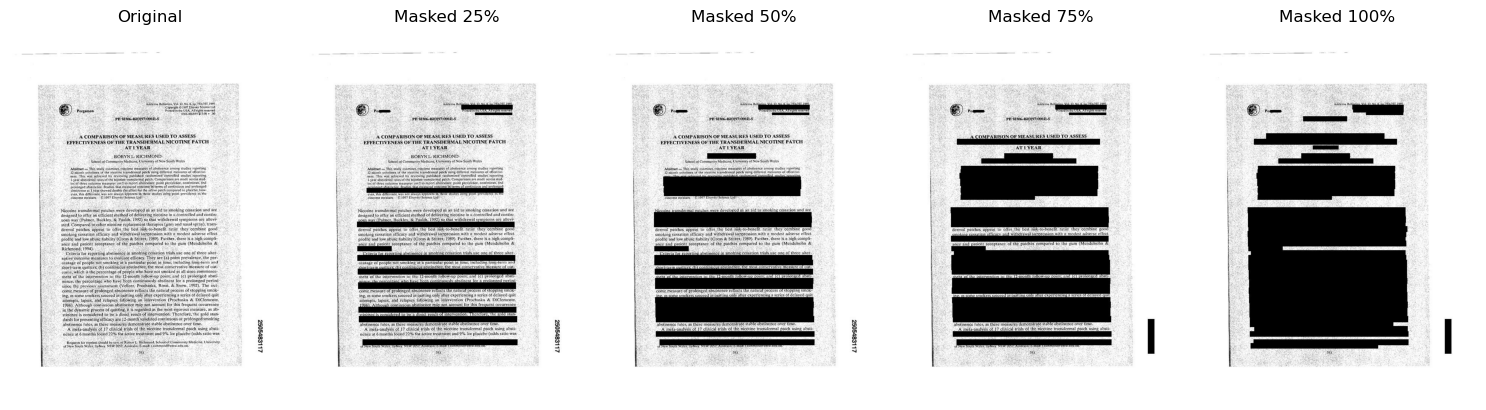

In [4]:
image_names = ["image_0_label_15.jpg", "image_1_label_10.jpg", "image_2_label_6.jpg"]
for img_name in image_names:
    show_image_versions_rvl_cdip(img_name)